In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

registered_nuisance = pd.read_csv("./datasets/registered_nuisance/geregistreerde_overlast_breda.csv", sep=";")

In [232]:
registered_nuisance

,Overlast,Perioden,Regio's,Geregistreerde overlast (aantal)
0,Totaal registraties overlast,2012 januari,Breda,276
1,Totaal registraties overlast,2012 februari,Breda,277
2,Totaal registraties overlast,2012 maart,Breda,313
3,Totaal registraties overlast,2012 april,Breda,242
4,Totaal registraties overlast,2012 mei,Breda,402
...,...,...,...,...
1318,Geluidshinder overig,2022,Breda,1719
1319,Geluidshinder overig,2023 januari,Breda,113
1320,Geluidshinder overig,2023 februari,Breda,88
1321,Geluidshinder overig,2023 maart,Breda,82


In [233]:
# Delete the row(s) where 'Perioden' column is '2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022'
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2012']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2013']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2014']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2015']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2016']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2017']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2018']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2019']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2020']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2021']
registered_nuisance = registered_nuisance[registered_nuisance['Perioden'] != '2022']

# Reset the index
registered_nuisance.reset_index(drop=True, inplace=True)

# Print the updated dataset
registered_nuisance

,Overlast,Perioden,Regio's,Geregistreerde overlast (aantal)
0,Totaal registraties overlast,2012 januari,Breda,276
1,Totaal registraties overlast,2012 februari,Breda,277
2,Totaal registraties overlast,2012 maart,Breda,313
3,Totaal registraties overlast,2012 april,Breda,242
4,Totaal registraties overlast,2012 mei,Breda,402
...,...,...,...,...
1219,Geluidshinder overig,2022 december,Breda,92
1220,Geluidshinder overig,2023 januari,Breda,113
1221,Geluidshinder overig,2023 februari,Breda,88
1222,Geluidshinder overig,2023 maart,Breda,82


In [234]:
# Split the "Perioden" column into 2 new columns named "Year" and "Month"
registered_nuisance[['Year', 'Month']] = registered_nuisance['Perioden'].str.split(' ', 1, expand=True)

# Delete the "Perioden" column
registered_nuisance.drop('Perioden', axis=1, inplace=True)

# Delete "Regio's" column
registered_nuisance.drop("Regio's", axis=1, inplace=True)

# Delete the "Month" column
registered_nuisance.drop('Month', axis=1, inplace=True)

C:\Users\maxme\AppData\Local\Temp\ipykernel_24716\3198245008.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  registered_nuisance[['Year', 'Month']] = registered_nuisance['Perioden'].str.split(' ', 1, expand=True)


In [235]:
registered_nuisance

,Overlast,Geregistreerde overlast (aantal),Year
0,Totaal registraties overlast,276,2012
1,Totaal registraties overlast,277,2012
2,Totaal registraties overlast,313,2012
3,Totaal registraties overlast,242,2012
4,Totaal registraties overlast,402,2012
...,...,...,...
1219,Geluidshinder overig,92,2022
1220,Geluidshinder overig,113,2023
1221,Geluidshinder overig,88,2023
1222,Geluidshinder overig,82,2023


In [236]:
# Aggregate the data by year, but add the values of the "Overlast" column
registered_nuisance = registered_nuisance.groupby(['Year', 'Overlast']).sum().reset_index()

In [237]:
registered_nuisance

,Year,Overlast,Geregistreerde overlast (aantal)
0,2012,Geluidshinder evenement,11
1,2012,Geluidshinder horeca,58
2,2012,Geluidshinder overig,1099
3,2012,Melding overlast jeugd,1206
4,2012,Openbare dronkenschap,66
...,...,...,...
103,2023,Openbare dronkenschap,14
104,2023,Overlast door verward persoon,577
105,2023,Overlast ivm alcohol/ drugs,241
106,2023,Overlast zwervers,256


In [172]:
#unique values in "Overlast" column
np.unique(registered_nuisance['Overlast'])

array(['Geluidshinder evenement', 'Geluidshinder horeca',
       'Geluidshinder overig', 'Melding overlast jeugd',
       'Openbare dronkenschap', 'Overlast door verward persoon',
       'Overlast ivm alcohol/ drugs', 'Overlast zwervers',
       'Totaal registraties overlast'], dtype=object)

In [173]:
totaal_overlast = registered_nuisance[registered_nuisance['Overlast']=='Totaal registraties overlast']
geluidshinder_evenement = registered_nuisance[registered_nuisance['Overlast']=='Geluidshinder evenement']
geluidshinder_horeca = registered_nuisance[registered_nuisance['Overlast']=='Geluidshinder horeca']
geluidshinder_overig = registered_nuisance[registered_nuisance['Overlast']=='Geluidshinder overig']
jeugd = registered_nuisance[registered_nuisance['Overlast']=='Melding overlast jeugd']
openbare_dronkenschap = registered_nuisance[registered_nuisance['Overlast']=='Openbare dronkenschap']
verward_persoon = registered_nuisance[registered_nuisance['Overlast']=='Overlast door verward persoon']
alcohol_drugs = registered_nuisance[registered_nuisance['Overlast']=='Overlast ivm alcohol/ drugs']
zwervers = registered_nuisance[registered_nuisance['Overlast']=='Overlast zwervers']

In [174]:
totaal_overlast

,Overlast,Perioden,Regio's,Geregistreerde overlast (aantal)
0,Totaal registraties overlast,2012 januari,Breda,276
1,Totaal registraties overlast,2012 februari,Breda,277
2,Totaal registraties overlast,2012 maart,Breda,313
3,Totaal registraties overlast,2012 april,Breda,242
4,Totaal registraties overlast,2012 mei,Breda,402
...,...,...,...,...
131,Totaal registraties overlast,2022 december,Breda,359
132,Totaal registraties overlast,2023 januari,Breda,413
133,Totaal registraties overlast,2023 februari,Breda,361
134,Totaal registraties overlast,2023 maart,Breda,419


In [175]:
n = np.array(totaal_overlast['Geregistreerde overlast (aantal)'])

In [176]:
n

array([276, 277, 313, 242, 402, 355, 358, 447, 371, 308, 267, 245, 359,
       213, 248, 273, 337, 339, 331, 368, 298, 281, 256, 221, 236, 237,
       275, 367, 349, 405, 414, 406, 393, 338, 317, 267, 234, 285, 251,
       333, 374, 431, 496, 394, 302, 339, 353, 367, 309, 277, 353, 406,
       436, 495, 569, 415, 443, 403, 303, 302, 327, 294, 301, 363, 388,
       478, 489, 397, 330, 333, 274, 302, 281, 239, 298, 329, 342, 418,
       346, 416, 315, 322, 264, 313, 266, 267, 282, 387, 343, 377, 392,
       366, 323, 312, 272, 275, 316, 302, 369, 546, 665, 620, 613, 607,
       474, 511, 485, 430, 547, 635, 582, 581, 603, 678, 733, 707, 629,
       473, 502, 536, 528, 462, 421, 437, 511, 506, 615, 567, 423, 428,
       415, 359, 413, 361, 419, 532], dtype=int64)

In [177]:
x = n[0:10]
y = n[10]

In [178]:
x

array([276, 277, 313, 242, 402, 355, 358, 447, 371, 308], dtype=int64)

In [179]:
y

267

In [180]:
n[0:15]

array([276, 277, 313, 242, 402, 355, 358, 447, 371, 308, 267, 245, 359,
       213, 248], dtype=int64)

In [181]:
x_len = 10
X_train = []
y_train = []
for i in range(100):
    X_train.append(n[i:i+x_len])
    y_train.append(n[i+x_len])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [182]:
X_test = []
y_test = []
for i in range(110, len(n) - x_len):
    X_test.append(n[i:i+x_len])
    y_test.append(n[i+x_len])
X_test = np.array(X_test)
y_test = np.array(y_test)

In [183]:
X_train.shape

(100, 10)

In [184]:
X_train

array([[276, 277, 313, 242, 402, 355, 358, 447, 371, 308],
       [277, 313, 242, 402, 355, 358, 447, 371, 308, 267],
       [313, 242, 402, 355, 358, 447, 371, 308, 267, 245],
       [242, 402, 355, 358, 447, 371, 308, 267, 245, 359],
       [402, 355, 358, 447, 371, 308, 267, 245, 359, 213],
       [355, 358, 447, 371, 308, 267, 245, 359, 213, 248],
       [358, 447, 371, 308, 267, 245, 359, 213, 248, 273],
       [447, 371, 308, 267, 245, 359, 213, 248, 273, 337],
       [371, 308, 267, 245, 359, 213, 248, 273, 337, 339],
       [308, 267, 245, 359, 213, 248, 273, 337, 339, 331],
       [267, 245, 359, 213, 248, 273, 337, 339, 331, 368],
       [245, 359, 213, 248, 273, 337, 339, 331, 368, 298],
       [359, 213, 248, 273, 337, 339, 331, 368, 298, 281],
       [213, 248, 273, 337, 339, 331, 368, 298, 281, 256],
       [248, 273, 337, 339, 331, 368, 298, 281, 256, 221],
       [273, 337, 339, 331, 368, 298, 281, 256, 221, 236],
       [337, 339, 331, 368, 298, 281, 256, 221, 236, 237

In [185]:
y_train.shape

(100,)

In [203]:
X_test

array([[582, 581, 603, 678, 733, 707, 629, 473, 502, 536],
       [581, 603, 678, 733, 707, 629, 473, 502, 536, 528],
       [603, 678, 733, 707, 629, 473, 502, 536, 528, 462],
       [678, 733, 707, 629, 473, 502, 536, 528, 462, 421],
       [733, 707, 629, 473, 502, 536, 528, 462, 421, 437],
       [707, 629, 473, 502, 536, 528, 462, 421, 437, 511],
       [629, 473, 502, 536, 528, 462, 421, 437, 511, 506],
       [473, 502, 536, 528, 462, 421, 437, 511, 506, 615],
       [502, 536, 528, 462, 421, 437, 511, 506, 615, 567],
       [536, 528, 462, 421, 437, 511, 506, 615, 567, 423],
       [528, 462, 421, 437, 511, 506, 615, 567, 423, 428],
       [462, 421, 437, 511, 506, 615, 567, 423, 428, 415],
       [421, 437, 511, 506, 615, 567, 423, 428, 415, 359],
       [437, 511, 506, 615, 567, 423, 428, 415, 359, 413],
       [511, 506, 615, 567, 423, 428, 415, 359, 413, 361],
       [506, 615, 567, 423, 428, 415, 359, 413, 361, 419]], dtype=int64)

In [204]:
y_test

array([528, 462, 421, 437, 511, 506, 615, 567, 423, 428, 415, 359, 413,
       361, 419, 532], dtype=int64)

In [188]:
print(type(X_train))

<class 'numpy.ndarray'>


In [189]:
print(type(X_train))

<class 'numpy.ndarray'>


---

# Linear Regression model

Coefficients: 
 [ 0.27027221  0.069857    0.15029848 -0.09000236  0.00385117 -0.01594216
 -0.1127789   0.06971895  0.12423545  0.73792964]
Mean squared error: 8562.52


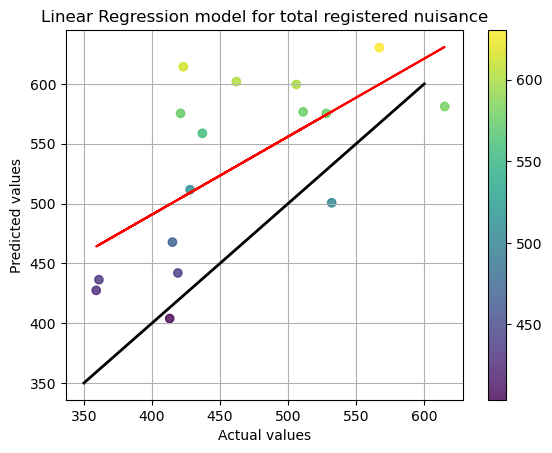

In [205]:
# Create linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))

# Plot outputs
colors = y_pred

plt.scatter(y_test, y_pred, c=colors, alpha=0.8, cmap='viridis') # plot the test values against the predicted values
plt.colorbar(); # show color scale
plt.title('Linear Regression model for total registered nuisance') #Add a title to the graph
plt.xlabel('Actual values') #Add a label to the x-axis
plt.ylabel('Predicted values') #Add a label to the y-axis
plt.grid() #Add grid lines to make the graph easier to read

#Putting a line in the regression plot
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.plot([350, 600], [350, 600], color='black', linewidth=2)

plt.show()

In [202]:
print('The R2 score is: ', lr.score(X_test, y_test))

The R2 score is:  -0.7065849588336297


---

# Random Forest Regression model

Feature Importances: 
 [0.06214734 0.02508036 0.03043705 0.02886498 0.05257869 0.03122014
 0.01620247 0.02624035 0.03289178 0.69433685]
Mean squared error: 4858.06


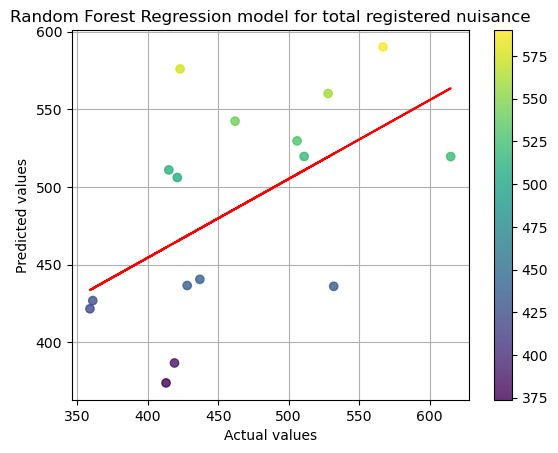

In [198]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print('Feature Importances: \n', rf.feature_importances_)

mse = mean_squared_error(y_test, y_pred_rf)
print('Mean squared error: %.2f' % mse)

# Plot outputs
colors = y_pred_rf

plt.scatter(y_test, y_pred_rf, c=colors, alpha=0.8, cmap='viridis')
plt.colorbar()
plt.title('Random Forest Regression model for total registered nuisance')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()

m, b = np.polyfit(y_test, y_pred_rf, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.show()

In [206]:
r2_score_rf = rf.score(X_test, y_test)
print('The R2 score is: ', r2_score_rf)

The R2 score is:  0.03174611546363815


---

# Desicion Tree Regression model

In [196]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4, random_state=0) #Creating a decision tree regressor object
dt.fit(X_train, y_train) #Fitting the model to the training data

DecisionTreeRegressor(max_depth=4, random_state=0)

In [197]:
y_pred_dt = dt.predict(X_test) #Predicting the test set results

Mean squared error: 8483.24


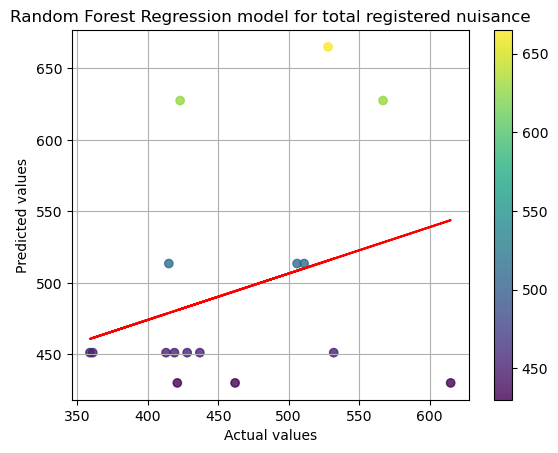

In [199]:
mse = mean_squared_error(y_test, y_pred_dt)
print('Mean squared error: %.2f' % mse)

# Plot outputs
colors = y_pred_dt

plt.scatter(y_test, y_pred_dt, c=colors, alpha=0.8, cmap='viridis')
plt.colorbar()
plt.title('Random Forest Regression model for total registered nuisance')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()

m, b = np.polyfit(y_test, y_pred_dt, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.show()

---

In [144]:
registered_nuisance

,Overlast,Perioden,Regio's,Geregistreerde overlast (aantal)
0,Totaal registraties overlast,2012 januari,Breda,276
1,Totaal registraties overlast,2012 februari,Breda,277
2,Totaal registraties overlast,2012 maart,Breda,313
3,Totaal registraties overlast,2012 april,Breda,242
4,Totaal registraties overlast,2012 mei,Breda,402
...,...,...,...,...
1219,Geluidshinder overig,2022 december,Breda,92
1220,Geluidshinder overig,2023 januari,Breda,113
1221,Geluidshinder overig,2023 februari,Breda,88
1222,Geluidshinder overig,2023 maart,Breda,82


In [145]:
#unique values in "Overlast" column
np.unique(registered_nuisance['Overlast'])

array(['Geluidshinder evenement', 'Geluidshinder horeca',
       'Geluidshinder overig', 'Melding overlast jeugd',
       'Openbare dronkenschap', 'Overlast door verward persoon',
       'Overlast ivm alcohol/ drugs', 'Overlast zwervers',
       'Totaal registraties overlast'], dtype=object)

In [157]:
n_ge = np.array(geluidshinder_overig['Geregistreerde overlast (aantal)'])

In [158]:
n_ge

array([ 73,  57,  76,  71, 121, 116,  94, 128, 123,  75,  76,  89,  72,
        49,  71, 101,  91, 144, 121, 164, 120,  98,  74,  93,  76,  77,
        70,  91, 130, 178, 142, 133, 160, 118, 115,  66,  93,  94,  83,
       103, 141, 153, 197, 149,  99,  99, 105, 129, 124,  82, 106, 124,
       151, 184, 194, 145, 143, 114, 101,  98,  77,  80,  60,  96, 118,
       176, 133, 109,  80,  97,  85,  85,  90,  90,  93, 102, 109, 110,
       119, 132,  91,  90,  57,  73,  70,  78,  60, 105,  92, 115, 113,
        87,  71,  68,  53,  68,  81,  89,  80, 156, 195, 161, 186, 197,
       147, 118, 134, 162, 224, 256, 187, 238, 248, 336, 323, 335, 284,
       225, 212, 234, 232, 179, 117,  94, 140, 156, 202, 188, 129,  99,
        91,  92, 113,  88,  82,  96], dtype=int64)

In [159]:
x = n_ge[0:10]
y = n_ge[10]

In [160]:
n_ge[0:15]

array([ 73,  57,  76,  71, 121, 116,  94, 128, 123,  75,  76,  89,  72,
        49,  71], dtype=int64)

In [161]:
X_train = []
y_train = []
for i in range(100):
    X_train.append(n_ge[i:i+x_len])
    y_train.append(n_ge[i+x_len])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [162]:
X_test = []
y_test = []
for i in range(110, len(n) - x_len):
    X_test.append(n_ge[i:i+x_len])
    y_test.append(n_ge[i+x_len])
X_test = np.array(X_test)
y_test = np.array(y_test)

Coefficients: 
 [ 0.15936838  0.09054403  0.07987865 -0.148366    0.14540139 -0.11350737
  0.08296817 -0.11208818 -0.00891389  0.84576581]
Mean squared error: 1984.96


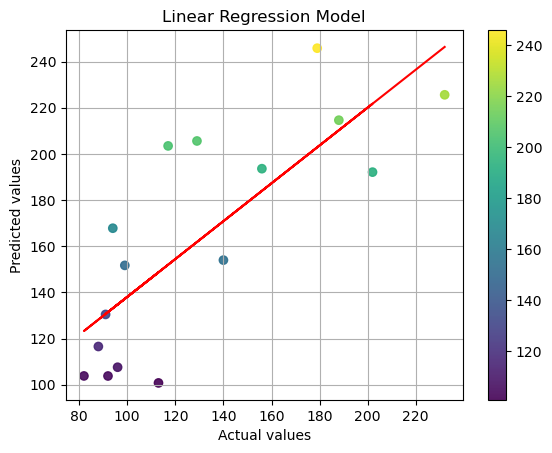

In [163]:
# Create linear regression object
lr = LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))

# Plot outputs
colors = y_pred

plt.scatter(y_test, y_pred, c=colors, alpha=0.9, cmap='viridis')
plt.colorbar();  # show color scale
plt.title('Linear Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()
#Putting a line in the regression plot
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.show()